# SI figure 1

In [1]:
# import general packages
import numpy as np
import os
import dill as pickle
pickle.settings['recurse'] = True

# Matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec

# Import functions
%matplotlib inline

# Plotting params

In [2]:
axes_color =  '0.8'

plt.rcParams.update({'font.size': 7,
                     'font.family': 'sans-serif',
                     'font.sans-serif' : 'Helvetica',
                     'font.style':'normal',
                     'axes.grid' : False,
                     'axes.edgecolor': axes_color,
                     'ytick.color': '.15',
                     'xtick.color':'.15',
                     'lines.linewidth':1,
                    })

ytick_major_size = 3.5
plt.rcParams['ytick.major.size'] = ytick_major_size
plt.rcParams['ytick.major.width'] = 0.8

xtick_major_size = 3.5
plt.rcParams['xtick.major.size'] = xtick_major_size
plt.rcParams['xtick.major.width'] = 0.8
plt.rcParams['lines.markersize'] = 2.5

plt.rcParams['errorbar.capsize'] = 1.5
plt.rcParams['lines.markeredgewidth'] = 0.5


linewidth_default = plt.rcParams['lines.linewidth']
markersize_default = plt.rcParams['lines.markersize']
elinewidht_default = plt.rcParams['lines.markeredgewidth']
capsize_default = plt.rcParams['errorbar.capsize']
markeredgewidth_default = plt.rcParams['lines.markeredgewidth']


# Define the analytical functions to be plotted

In [3]:
def PNspec0(theta, sigma):
    return 1./(sigma*np.sqrt(2*np.pi)) * np.exp(-1./2 * theta**2 / sigma**2)

def Holevo0Nspec0(phi, sigma):
    return 1./2*np.exp(-sigma**2) * ( np.cosh(1./2*sigma**2) +  np.cosh(sigma**2 + 1j*phi) + np.sinh(1./2*sigma**2) )

def Holevo1Nspec0(phi, sigma):
    return 1./2*np.exp(-sigma**2) * ( np.cosh(1./2*sigma**2) -  np.cosh(sigma**2 + 1j*phi) + np.sinh(1./2*sigma**2) )

def absHolevoNspec0(phi,sigma):
    return np.abs( Holevo0Nspec0(phi,sigma) ) + np.abs( Holevo1Nspec0(phi,sigma) )



def PNspec1(theta, sigma):
    return 1./(sigma*np.sqrt(2*np.pi)) * np.exp(-1./2 * theta**2/sigma**2) * (1 + np.cos(theta - np.pi/2))

def Holevo0Nspec1(phi, sigma):
    return 1./8 * (2*1j - 2*1j*np.exp(-2*sigma**2) + 4*np.exp(-1./2*sigma**2) + 2*np.exp(1j*phi) + np.exp(-9./2 * sigma**2 - 1j*phi)*( -1j + 2*np.exp(5./2*sigma**2) + 1j*np.exp(4*sigma**2) ) )
    
def Holevo1Nspec1(phi, sigma):
    return 1./8 * (2*1j - 2*1j*np.exp(-2*sigma**2) + 4*np.exp(-1./2*sigma**2) - 2*np.exp(1j*phi) - 1j*np.exp(-9./2 * sigma**2 - 1j*phi)*( -1 - 2*1j*np.exp(5./2*sigma**2) + np.exp(4*sigma**2) ) )

def absHolevoNspec1(phi,sigma):
    return np.abs( Holevo0Nspec1(phi,sigma) ) + np.abs( Holevo1Nspec1(phi,sigma) )

def PNspec0Exp(sigma):
    return np.arctan2( 0, np.exp(-1./2*sigma**2) )

def PNspec1Exp(sigma):
    return np.arctan2( np.exp(-sigma**2) * np.sinh(sigma**2), np.exp(-1./2 * sigma**2) )

# Generate the figure

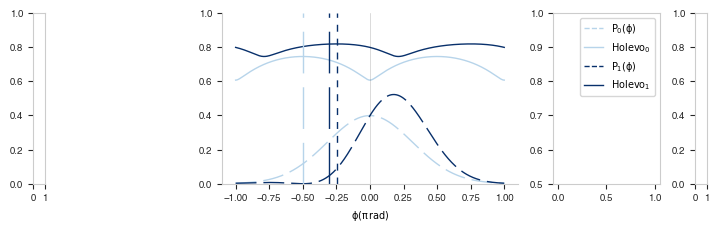

In [4]:
# Define the figure, gridspec and sub-gridspec. From these gridspecs, define the plot axes.
fig_multiplier = 1
fig = plt.figure(figsize = [18.3/2.54*1*fig_multiplier,8.9/2.54/1.5*fig_multiplier]) # ,constrained_layout=True)

gs = GridSpec(1, 15, figure=fig)#, hspace = 0.1, wspace = 0.1)
ax = fig.add_subplot(gs[0,4:11])
ax_dummy1 = fig.add_subplot(gs[0,0])
ax_dummy2 = fig.add_subplot(gs[0,11:14])
ax_dummy3 = fig.add_subplot(gs[0,14])


N_phi_points = 1000
sigma = 1
colors = cm.Blues(np.linspace(0.3,1,2))

phi_pi = np.linspace(-1, 1, N_phi_points)

P_Nspec0 = PNspec0(phi_pi*np.pi, sigma)
H_Nspec0 = absHolevoNspec0(phi_pi*np.pi, sigma)
P_Nspec1 = PNspec1(phi_pi*np.pi, sigma)
H_Nspec1 = absHolevoNspec1(phi_pi*np.pi, sigma)

phi_pi_H_Nspec1_max = phi_pi[ np.argmax(H_Nspec1[:int(N_phi_points/2)]) ]

spec0_color = colors[0]
spec1_color = colors[1]
dash_len = 2.5*fig_multiplier
space = 5*fig_multiplier
ax.plot(phi_pi, P_Nspec0, label = r'$\mathrm{P_{0}(\phi)}$', color = spec0_color, linestyle = '--', dashes=(6*dash_len, space), linewidth = linewidth_default*fig_multiplier)
ax.plot(phi_pi, H_Nspec0, label = r'$\mathrm{Holevo_{0}}$', color = spec0_color, linewidth = 1*fig_multiplier)
ax.plot(phi_pi, P_Nspec1, label = r'$\mathrm{P_{1}(\phi)}$', color = spec1_color, linestyle = '--', dashes=(6*dash_len, space), linewidth = linewidth_default*fig_multiplier)
ax.plot(phi_pi, H_Nspec1, label = r'$\mathrm{Holevo_{1}}$', color = spec1_color, linewidth = 1*fig_multiplier)

dash_len = 5*fig_multiplier
space = 10*fig_multiplier
ax.axvline(x = 1./np.pi * PNspec0Exp(sigma) - 1./2, color = spec0_color, linestyle = '--', dashes=(6*dash_len, space), linewidth = linewidth_default*fig_multiplier)
ax.axvline(x = 1./np.pi * PNspec1Exp(sigma) - 1./2, color = spec1_color, dashes=(6*dash_len, space), linewidth = linewidth_default*fig_multiplier)
ax.axvline(x = phi_pi_H_Nspec1_max, color = spec1_color, dashes=(dash_len, 1./2*space), linewidth = linewidth_default*fig_multiplier)
ax.axvline(x = 0, color = 'k', alpha = 0.2, linewidth = 0.5*fig_multiplier)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.legend()# bbox_to_anchor = [1,0.8] )
ax.set_ylim([0,1])
ax.set_xlabel(r'$\mathrm{ \phi(\pi \, rad) } $')
# ax.set_ylabel(r'A.U.')

ax_dummy2.plot([0,1], [0,0], label = r'$\mathrm{P_{0}(\phi)}$', color = spec0_color, linestyle = '--', linewidth = linewidth_default*fig_multiplier)
ax_dummy2.plot([0,1], [0,0], label = r'$\mathrm{Holevo_{0}}$', color = spec0_color, linewidth = linewidth_default*fig_multiplier)
ax_dummy2.plot([0,1], [0,0], label = r'$\mathrm{P_{1}(\phi)}$', color = spec1_color, linestyle = '--', linewidth =linewidth_default*fig_multiplier)
ax_dummy2.plot([0,1], [0,0], label = r'$\mathrm{Holevo_{1}}$', color = spec1_color, linewidth = linewidth_default*fig_multiplier)
ax_dummy2.legend()
ax_dummy2.set_ylim([0.5,1])

plt.tight_layout()

# FolderPath = r'...' 
# FigName = 'SI_Fig1.pdf'
# FigSavePath = os.path.join(FolderPath,FigName)

# plt.savefig(FigSavePath, bbox_inches='tight')# , transparent=True)
